In [1]:
import matplotlib.pyplot as plt

from scipy.special import logit,expit

import tree_braider as trbr
import tree_reader as trr
import lumberjack

import numpy as np

In [2]:
r1 = {}

r1['feature'] = '0'
r1['split'] = 1
r1['features'] = ['1']
r1['samples'] = ['0','1','2']
r1['medians'] = [0]
r1['dispersions'] = [0]
r1['local_gains'] = None
r1['absolute_gains'] = None
r1['children'] = []


In [3]:
c1 = {}

c1['feature'] = '0'
c1['split'] = 1
c1['features']= ['1']
c1['samples'] = ['1','2']
c1['medians'] = [0]
c1['dispersions'] = [0]
c1['local_gains'] = None
c1['absolute_gains'] = None
c1['children'] = []

c2 = {}

c2['feature'] = '0'
c2['split'] = 1
c2['features']= ['1']
c2['samples'] = ['0']
c2['medians'] = [0]
c2['dispersions'] = [0]
c2['local_gains'] = None
c2['absolute_gains'] = None
c2['children'] = []


r1['children'] = [c1,c2]


In [4]:
test_counts = np.array([[1],[2],[3]])

test_forest = trr.Forest([r1],test_counts)

In [5]:
test_forest.nodes()

In [6]:
test_forest.truth_dictionary.sample_dictionary

{'0': 0, '1': 1, '2': 2}

In [7]:
test_forest.nodes()[2].index

2

In [8]:
test_forest.nodes()[2].lr_encoding_vectors()

[array([False,  True,  True]), array([ True, False, False])]

In [9]:
iris = np.loadtxt('../testing/iris.trunc')

In [10]:
iris_forest = lumberjack.fit(iris,trees=100,depth=2)

Setting context
Input:(150, 4)
Output:(150, 4)
CHECK TRUTH
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmph9r899xr
['input.counts', 'output.counts', 'tmp.i.header', 'tmp.o.header']
Generating trees
Running /Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/target/release/lumberjack_1
Command: /Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/target/release/lumberjack_1 generate -ic /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmph9r899xr/input.counts -oc /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmph9r899xr/output.counts -o /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmph9r899xr/tmp -auto -ifh /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmph9r899xr/tmp.i.header -ofh /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmph9r899xr/tmp.o.header -trees 100 -depth 2
Trying to readline

5.1 0
100
150,4

5.1 0
100
150,4
Automatic parameters:
ss:100
if:4
of:4
p:8
t:100
l:10
d:No
pm:Branch
Reading header: /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/t

/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmph9r899xr/tmp.99.compact
Derived from prototype, rank table size: (4, 100)
Tree Pool: Growing 100
SSME
Unwrapping tree
Tree Pool: Sending 100
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmph9r899xr/tmp.100.compact
Termination request


INPUT ARRAY FEATURES:4
OUTPUT ARRAY FEATURES:4
SAMPLE HEADER:150

CHECK OUTPUT
['tmp.80.compact', 'tmp.90.compact', 'tmp.39.compact', 'tmp.29.compact', 'tmp.16.compact', 'tmp.8.compact', 'tmp.64.compact', 'tmp.74.compact', 'tmp.42.compact', 'input.counts', 'tmp.52.compact', 'tmp.99.compact', 'tmp.89.compact', 'tmp.20.compact', 'tmp.30.compact', 'tmp.1.compact', 'tmp.53.compact', 'tmp.43.compact', 'tmp.31.compact', 'tmp.21.compact', 'tmp.88.compact', 'tmp.98.compact', 'tmp.0.compact', 'tmp.28.compact', 'tmp.38.compact', 'tmp.91.compact', 'tmp.81.compact', 'tmp.17.compact', 'tmp.75.compact', 'tmp.65.compact', 'tmp.9.compact', 'tmp.23.compact', 'tmp.33.compact', 'tmp.41.compact', 'tmp.5

In [11]:
iris_forest.nodes()[0].samples

['9',
 '37',
 '37',
 '37',
 '34',
 '48',
 '33',
 '33',
 '36',
 '8',
 '8',
 '47',
 '46',
 '42',
 '42',
 '38',
 '2',
 '2',
 '2',
 '25',
 '4',
 '27',
 '28',
 '29',
 '29',
 '35',
 '35',
 '19',
 '18',
 '41',
 '40',
 '40']

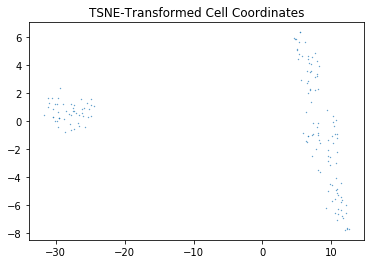

In [12]:
iftc = iris_forest.tsne()

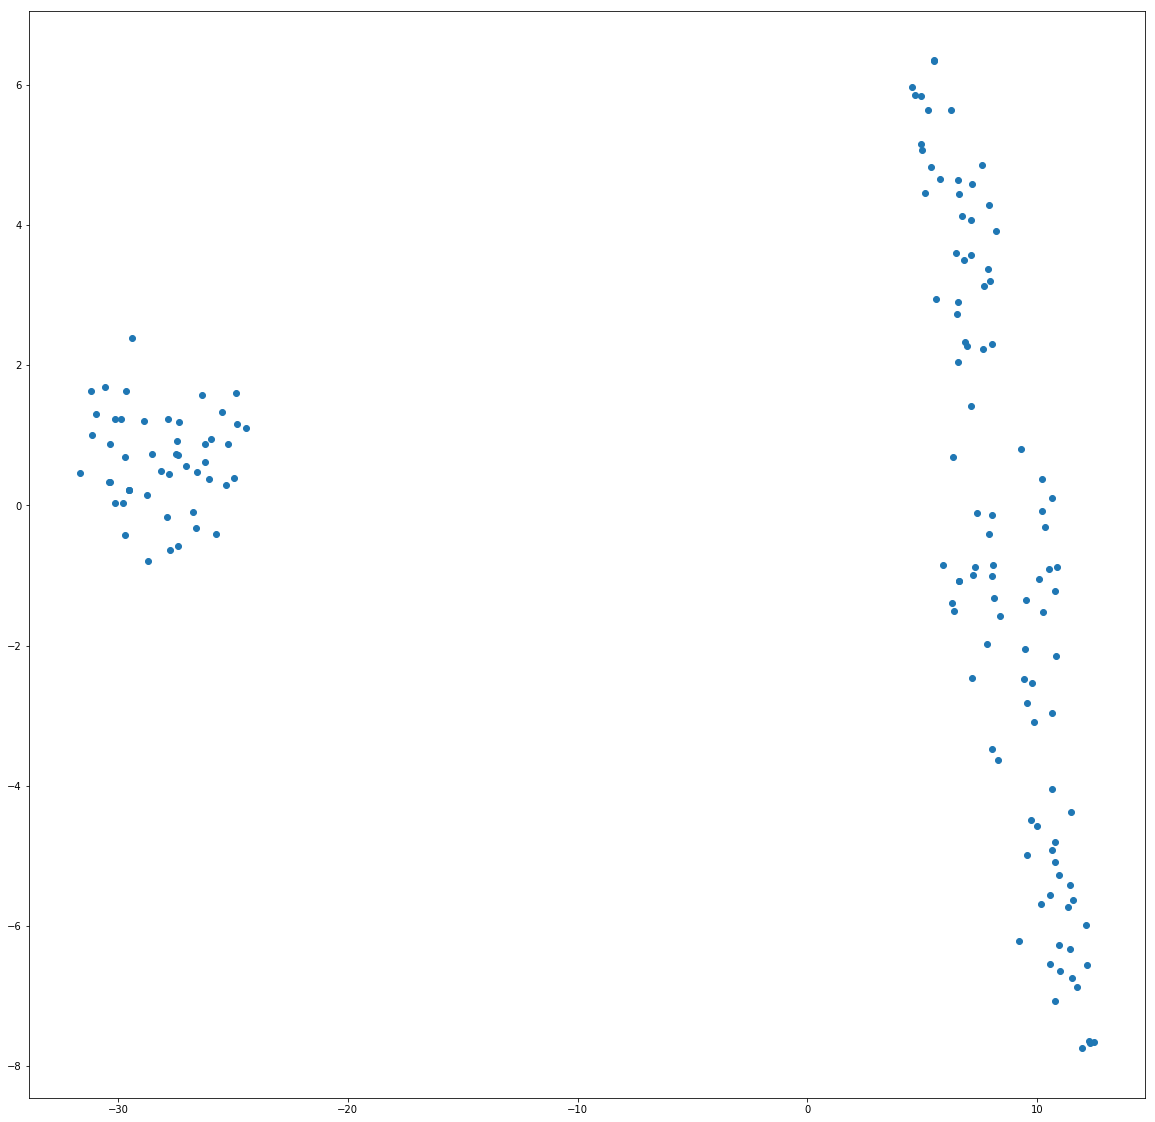

In [13]:
plt.figure(figsize=(20,20))
plt.scatter(iftc[:,0],iftc[:,1])
plt.show()

In [14]:
braids = trbr.IHMM(iris_forest)

In [15]:
print(braids.hidden_states[0].sample_log_odds)
print(braids.hidden_states[1].sample_log_odds)
print(braids.hidden_states[2].sample_log_odds)
print(braids.hidden_states[3].sample_log_odds)
print(braids.hidden_states[4].sample_log_odds)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0

In [28]:
braids.sample_states()

Sampling node state
[0. 0. 0. 0. 0.]
[          -inf 3.00000000e+00 3.34777359e+00 1.64709791e+02
 1.37503524e-01]
[0.00000000e+00 8.00000000e+00 1.01807617e+01 3.82461393e+49
 1.10000000e+00]
Sampling node state
[0. 0. 0. 0. 0.]
[        -inf   3.           5.43294429 180.99540622   0.27500705]
[0.00000000e+00 8.00000000e+00 4.31995473e+01 3.05524716e+54
 1.21000000e+00]
Sampling node state
[0. 0. 0. 0. 0.]
[        -inf   3.           8.15529439 170.99355753   0.82502114]
[0.00000000e+00 8.00000000e+00 2.85094103e+02 2.97981897e+51
 1.77156100e+00]
Sampling node state
[0. 0. 0. 0. 0.]
[          -inf 3.00000000e+00 1.06128795e+01 1.71977776e+02
 1.37503524e-01]
[0.00000000e+00 8.00000000e+00 1.56601199e+03 5.89480187e+51
 1.10000000e+00]
Sampling node state
[0. 0. 0. 0. 0.]
[        -inf   3.          10.61312105 170.34614585   0.55001409]
[0.00000000e+00 8.00000000e+00 1.56627416e+03 1.90238996e+51
 1.46410000e+00]
Sampling node state
[0. 0. 0. 0. 0.]
[        -inf   3.          19.

Sampling node state
[0. 0. 0. 0. 0.]
[       -inf  3.         86.78607675  4.80000172  0.13750352]
[0.00000000e+00 8.00000000e+00 1.33417350e+26 2.78576512e+01
 1.10000000e+00]
Sampling node state
[0. 0. 0. 0. 0.]
[       -inf  3.          1.60846    64.78848111  0.41251057]
[0.00000000e+00 8.00000000e+00 3.04926175e+00 3.18622314e+19
 1.33100000e+00]
Sampling node state
[0. 0. 0. 0. 0.]
[       -inf  3.         74.80699172  1.5644058   0.13750352]
[0.00000000e+00 8.00000000e+00 3.30482443e+22 2.95755664e+00
 1.10000000e+00]
Sampling node state
[0. 0. 0. 0. 0.]
[       -inf  3.         30.05882735 90.396462    0.13750352]
[0.00000000e+00 8.00000000e+00 1.11842964e+09 1.62947073e+27
 1.10000000e+00]
Sampling node state
[0. 0. 0. 0. 0.]
[       -inf  3.         57.61581223 10.97988807  0.        ]
[0.00000000e+00 8.00000000e+00 2.20845069e+17 2.01964788e+03
 1.00000000e+00]
Sampling node state
[0. 0. 0. 0. 0.]
[       -inf  3.         13.87688294 58.36297823  0.27500705]
[0.00000000e+00 

In [17]:
# print(braids.hidden_states[0].sample_log_odds)
# print(braids.hidden_states[1].sample_log_odds)
# print(braids.hidden_states[2].sample_log_odds)
# print(braids.hidden_states[3].sample_log_odds)
# print(braids.hidden_states[4].sample_log_odds)
print(braids.hidden_states[4].node_odds())

[34.19226125740373, 40.15507548884854, 36.99073275300189, 40.040481971562215, 38.16285429832055, 40.4338571563424, 36.419226887734496, 36.140099172315786, 12.481897638757337, 5.394057429156222, 8.798313908497127, 0.9959030687568404, 11.374416431151753, 3.911134197000159, 12.112302778535396, 14.071894977921009, 2.48805343915385, 10.855729182869775, 14.17156308411342, 13.228958216593488, 16.593735988890153]


In [18]:
[n.hidden_state for n in braids.nodes]

[1,
 1,
 2,
 3,
 3,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 4,
 3,
 1,
 1,
 1,
 4,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 4,
 1,
 1,
 4,
 1,
 3,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 4,
 2,
 1,
 2,
 1,
 1,
 1,
 4,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 4,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 4,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 4,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 4,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 4,
 1,


115


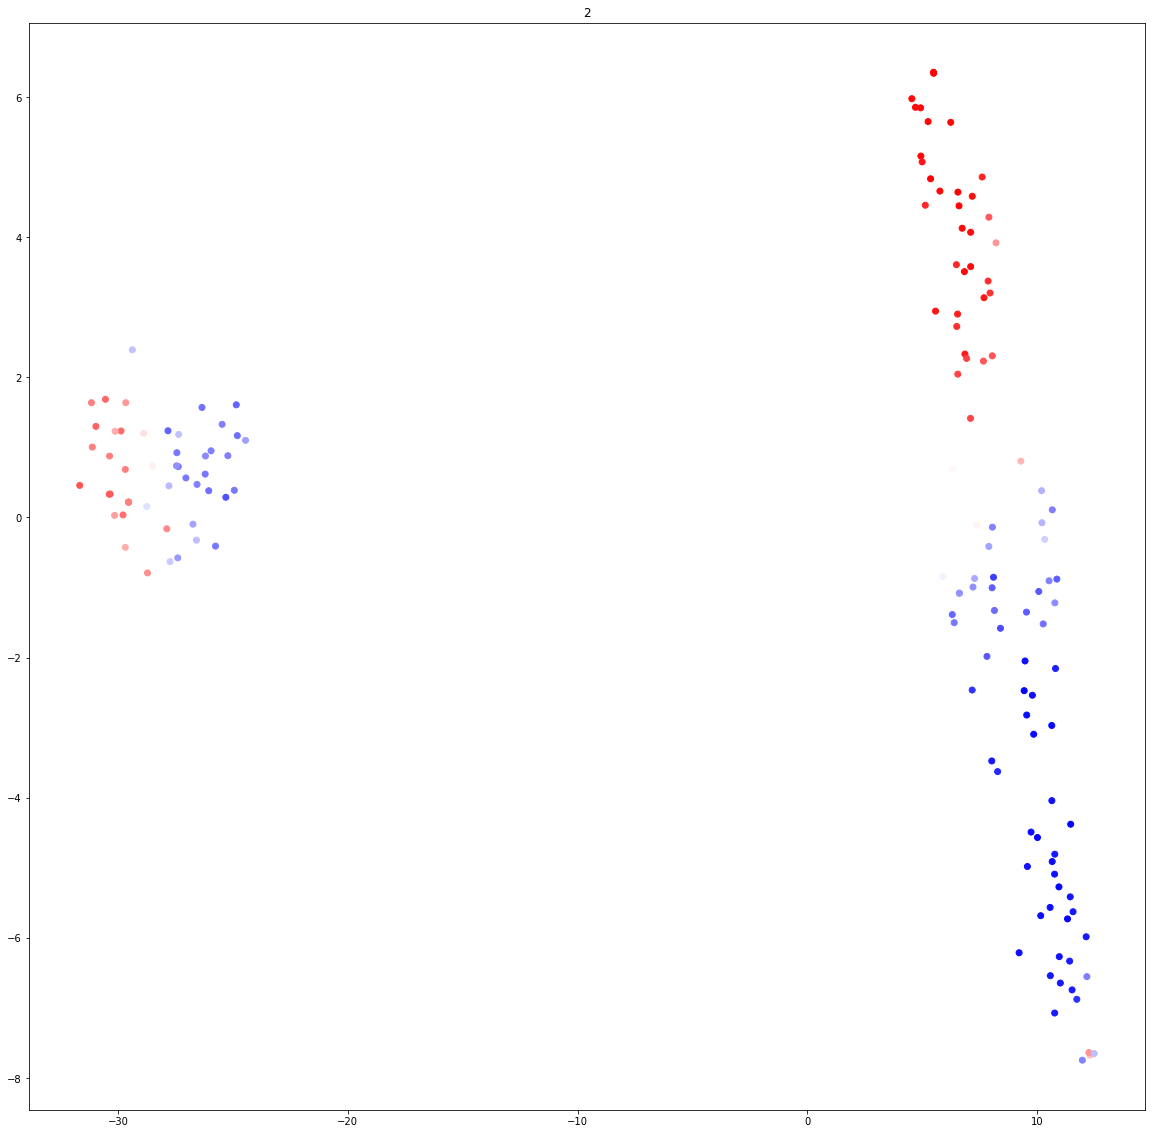

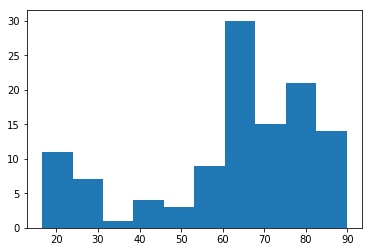

185


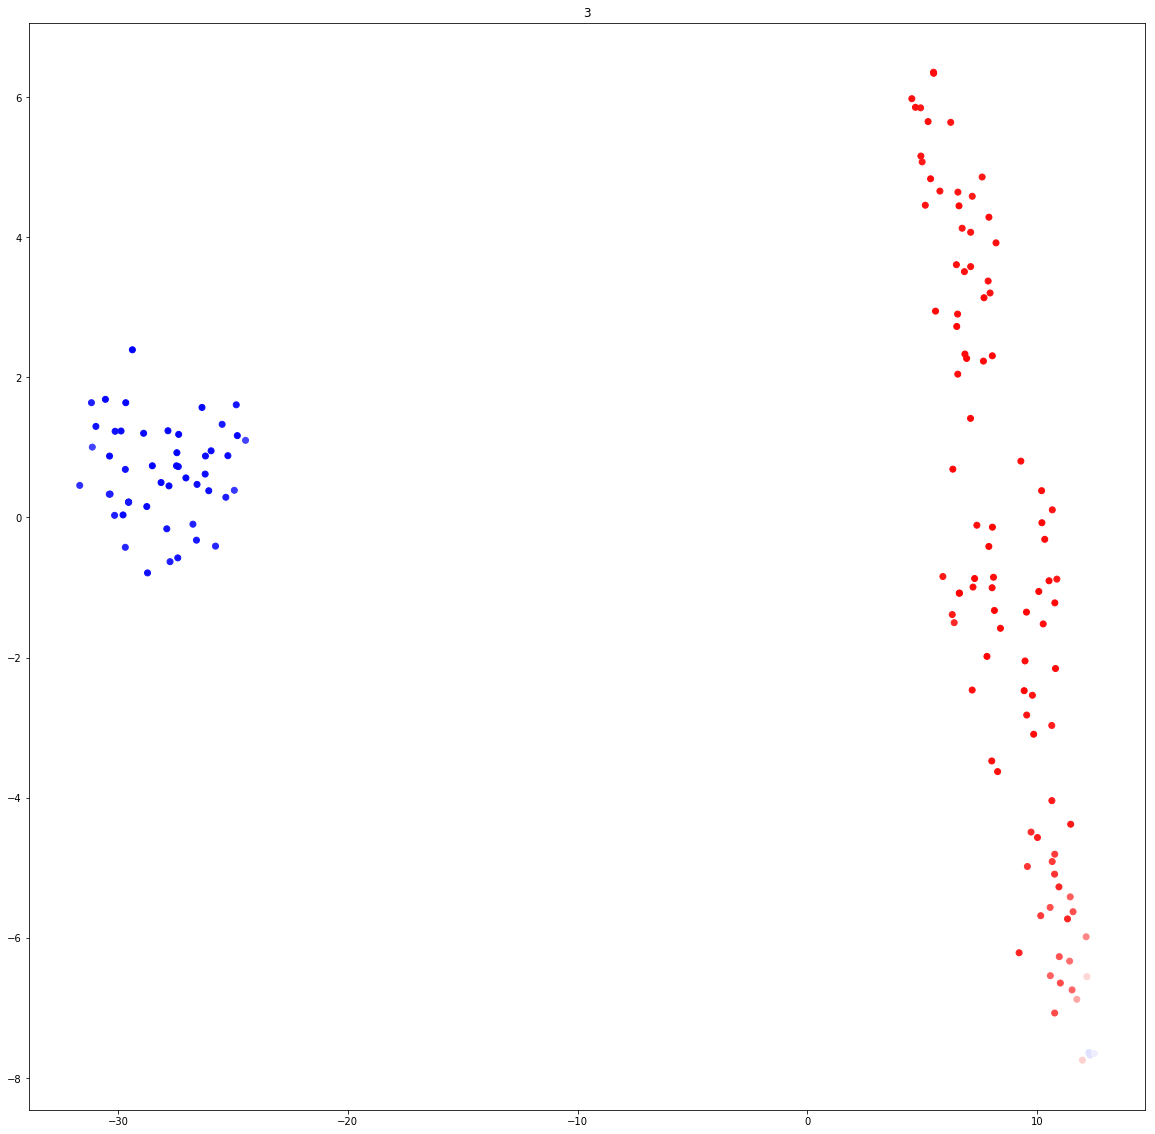

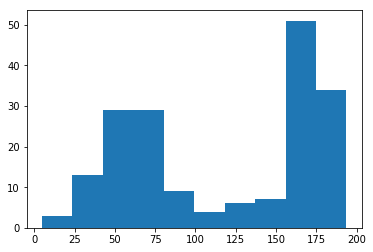

0


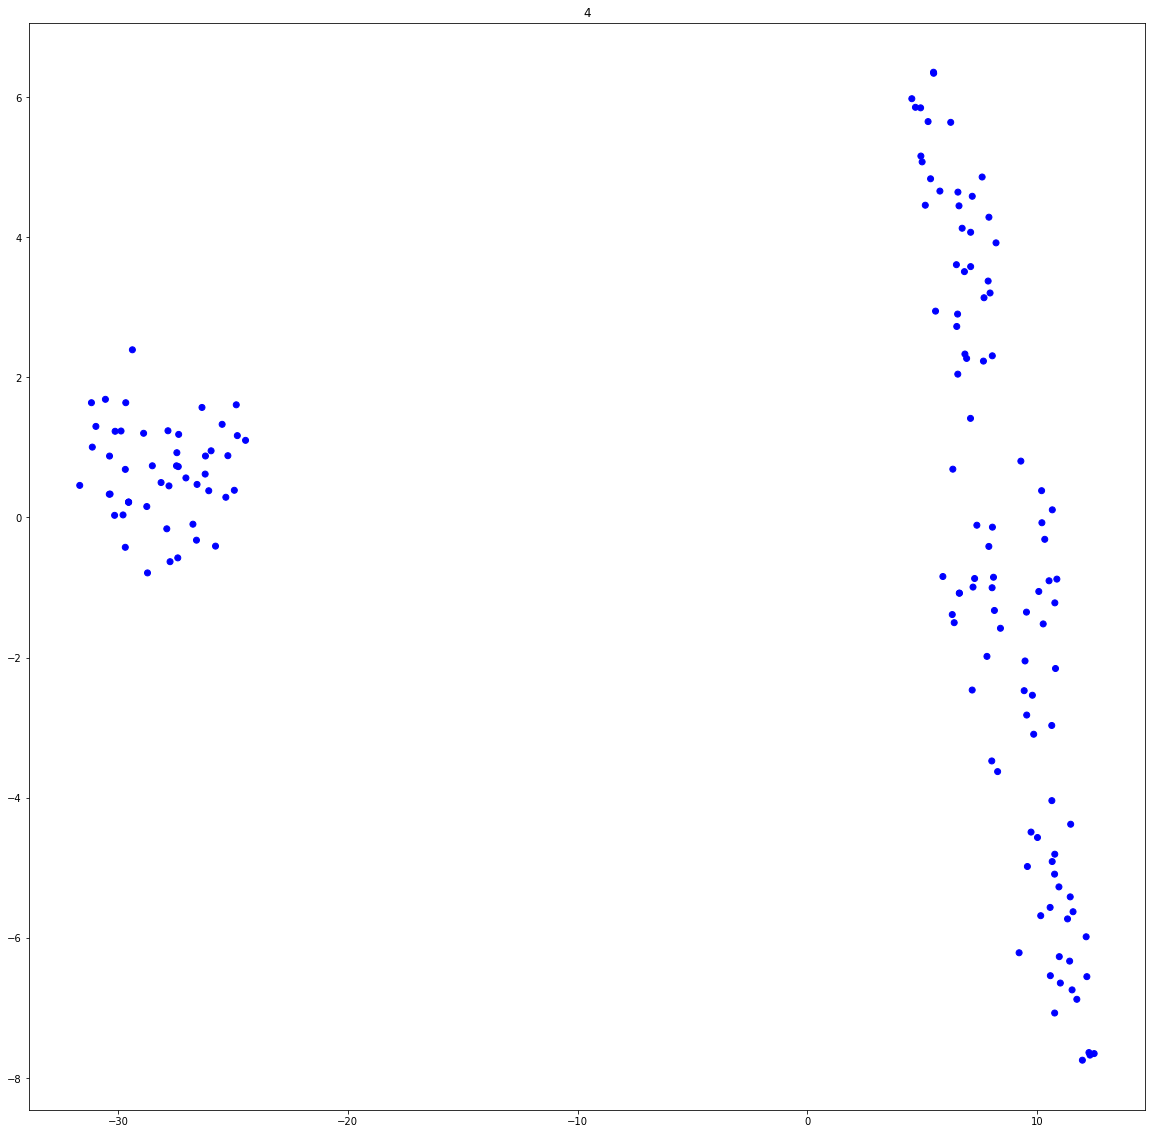

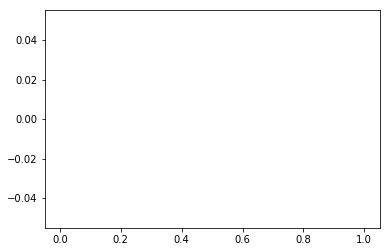

In [29]:
for hidden_state in braids.hidden_states[2:]:
    print(len(hidden_state.nodes))
    plt.figure(figsize=(20,20))
    plt.title(str(hidden_state.index))
    plt.scatter(iftc[:,0],iftc[:,1],c=hidden_state.lr_finite(),cmap='bwr')
    plt.show()
    plt.figure()
    plt.hist(hidden_state.node_odds())
    plt.show()